<a href="https://colab.research.google.com/github/rkdud3936/Python/blob/main/ml03_train_test_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* 머신 러닝의 과정
    * 문제 정의 --> 데이터 준비 --> 데이터 탐색 --> 훈련 셋, 검증 셋, 테스트 셋 분리 --> 모델 선택, 훈련 --> 모델 평가 --> 모델 튜닝
* 훈련 셋, 검증 셋, 테스트 셋으로 나누는 방법
    * 순차 추출(sequential sampling)
    * 임의 추출(random sampling)
    * 층화 추출(stratified sampling)
* 분류 모델 평가 지표
    * 정확도(accuracy)
    * 정밀도(precision)
    * 재현율(recall)
    * F1-score
    * 민감도(sensitivity)
    * 특이도
* 특성 스케일링
    * 표준화(standardization)
    * 정규화(normalization)

# 필요한 모듈, 클래스, 함수들 import

In [ ]:
import numpy as np  # ndarray(배열) 함수, 메서드
import pandas as pd  # Series, DataFrame 함수, 메서드
import matplotlib.pyplot as plt  # 시각화
import seaborn as sns  # 시각화

# Machine Learning
# 머신 러닝 모델(알고리즘) - KNN 분류기
from sklearn.neighbors import KNeighborsClassifier
# 훈련/테스트 셋 분리 함수
from sklearn.model_selection import train_test_split
# 모델 평가 지표 함수
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 특성 스케일링 클래스
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# 데이터 준비

* fish.csv 파일: 어종, 특성들(무게, 길이, ...)
* 2진 분류(도미, 빙어)
* 특성 2개(무게, 길이)만 사용


In [ ]:
fish_csv = 'https://github.com/JakeOh/202110_itw_lab_python/raw/main/fish.csv'

In [ ]:
fish = pd.read_csv(fish_csv)

In [ ]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   159 non-null    object 
 1   Weight    159 non-null    float64
 2   Length    159 non-null    float64
 3   Diagonal  159 non-null    float64
 4   Height    159 non-null    float64
 5   Width     159 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.6+ KB


In [ ]:
df = fish.loc[fish['Species'].isin(['Bream', 'Smelt']), 
              ['Species', 'Weight', 'Length']]

In [ ]:
df.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [ ]:
# DataFrame을 특성과 타겟으로 분리하고 ndarray(배열)로 변환.
features = df.iloc[:, 1:].values
target = df['Species'].values

In [ ]:
features.shape  # (n_samples, n_features)

(49, 2)

In [ ]:
target.shape  # (n_smaples,)

(49,)

In [ ]:
features[:5, :]

array([[242. ,  25.4],
       [290. ,  26.3],
       [340. ,  26.5],
       [363. ,  29. ],
       [430. ,  29. ]])

In [ ]:
target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [ ]:
np.unique(target, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([35, 14]))

# 훈련 셋, 테스트 셋 분리

훈련 셋:테스트 셋 = 7:3

## 순차 추출(sequential sampling)

In [ ]:
49 * 0.7, 49 * 0.3

(34.3, 14.7)

In [ ]:
num_test = 35  # 훈련 셋의 샘플 개수 -> 테스트 셋의 샘플 개수: 48 - 35 = 14

In [ ]:
X_train = features[:num_test, :]  # 훈련 셋
y_train = target[:num_test]       # 훈련 레이블
X_test = features[num_test:, :]   # 테스트 셋
y_test = target[num_test:]        # 테스트 레이블

In [ ]:
np.unique(y_train)
#> 훈련 셋에는 물고기의 종류가 모두 도미(Bream)만 있음.

array(['Bream'], dtype=object)

In [ ]:
np.unique(y_test)
#> 테스트 셋에는 모두 빙어(Smelt)만 있음.

array(['Smelt'], dtype=object)

In [ ]:
# train_test_split 함수를 사용한 순차 추출
X_train, X_test, y_train, y_test = train_test_split(features, target, 
                                                    train_size=35,  # 훈련 셋의 샘플 개수
                                                    shuffle=False)  # 샘플을 섞지 않음 -> 순차 추출

In [ ]:
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [ ]:
y_train.shape, y_test.shape

((35,), (14,))

In [ ]:
np.unique(y_train)

array(['Bream'], dtype=object)

In [ ]:
np.unique(y_test)

array(['Smelt'], dtype=object)

훈련 셋과 테스트 셋 시각화

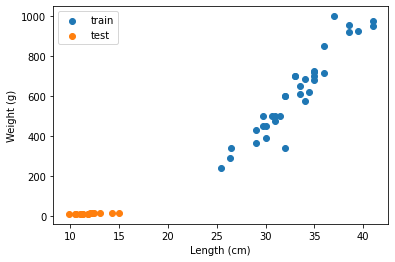

In [ ]:
plt.scatter(x=X_train[:, 1], y=X_train[:, 0], label='train')  # 훈련 셋
plt.scatter(x=X_test[:, 1], y=X_test[:, 1], label='test')  # 테스트 셋

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.show()

### KNN 분류기 훈련, 예측, 평가

In [ ]:
knn = KNeighborsClassifier()  # 머신 러닝 모델 생성

In [ ]:
knn.fit(X_train, y_train)  # 머신 러닝 모델 훈련

KNeighborsClassifier()

In [ ]:
# 훈련 셋에서의 예측 결과 평가
train_pred = knn.predict(X_train)
train_pred

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [ ]:
# 훈련 셋의 실젯값(훈련 레이블)
y_train

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [ ]:
# 훈련 셋 정확도
train_acc = np.mean(train_pred == y_train)
train_acc

1.0

In [ ]:
# 테스트 셋에서의 예측 결과 평가
test_pred = knn.predict(X_test)
test_pred

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream'],
      dtype=object)

In [ ]:
# 테스트 셋의 실젯값(테스트 레이블)
y_test

array(['Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt',
       'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt', 'Smelt'],
      dtype=object)

In [ ]:
# 테스트 셋 정확도
test_acc = np.mean(test_pred == y_test)
test_acc

0.0

## 임의 추출(Random Sampling)

In [ ]:
idx = np.arange(49)
print(idx)
np.random.shuffle(idx)
print(idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[15 28 45 33  7  6 39 12  9 22 37 16  8 42 20 26 24 11  4 21 47 27 38 19
 32  2 41 48 36  0 30 25 34 31  3 29 18 10 13  5 46 14  1 40 23 43 17 35
 44]


In [ ]:
# 훈련 셋/테스트 셋을 임의 추출 방식으로 분리
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    train_size=35,    # 훈련 셋의 크기(샘플 개수)
                                                    shuffle=True,     # 데이터를 무작위로 섞음. 기본값 True.
                                                    random_state=42)  # 난수 seed 설정

In [ ]:
# 훈련 셋, 테스트 셋의 shape
X_train.shape, X_test.shape

((35, 2), (14, 2))

In [ ]:
# 훈련 레이블, 테스트 레이블의 shape
y_train.shape, y_test.shape

((35,), (14,))

In [ ]:
# 훈련 레이블에서 도미(Bream)/빙어(Smelt)의 빈도수
np.unique(y_train, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([24, 11]))

In [ ]:
# 테스트 레이블에서 도미/빙어의 빈도수
np.unique(y_test, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([11,  3]))

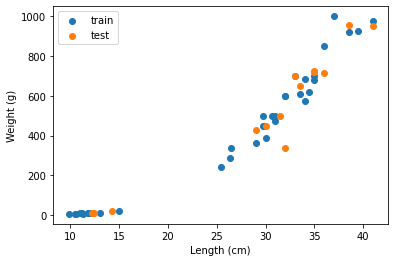

In [ ]:
# 훈련 셋/테스트 셋 시각화
plt.scatter(X_train[:, 1], X_train[:, 0], label='train')  # 훈련 셋 산점도
plt.scatter(X_test[:, 1], X_test[:, 0], label='test')  # 테스트 셋 산점도

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.show()

### KNN 모델 훈련, 예측, 평가

In [ ]:
knn = KNeighborsClassifier()  # 모델 생성

In [ ]:
knn.fit(X_train, y_train)  # 모델 훈련

KNeighborsClassifier()

In [ ]:
train_pred = knn.predict(X_train)  # 훈련 셋 예측값
print(train_pred)

['Bream' 'Bream' 'Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream'
 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt']


In [ ]:
print(y_train)  # 실젯값(훈련 셋 레이블)

['Bream' 'Bream' 'Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream'
 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt']


In [ ]:
train_acc = knn.score(X_train, y_train)  # 훈련 셋 정확도
train_acc

1.0

In [ ]:
test_pred = knn.predict(X_test)  # 테스트 셋의 예측값
print(test_pred)

['Bream' 'Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [ ]:
print(y_test)  # 테스트 셋 실젯값(테스트 레이블)

['Bream' 'Smelt' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [ ]:
test_acc = knn.score(X_test, y_test)  # 테스트 셋 정확도
test_acc

1.0

## 층화 추출(Stratified Sampling)

데이터 셋에서 각 클래스의 비율이 훈련 셋과 테스트 셋에서 비슷하게 유지되도록 샘플링을 하는 방법.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.3,
                                                    stratify=target,
                                                    random_state=42)

`train_test_split` 함수 파라미터 설명
* train_size: 훈련 셋의 개수(비율), test_size: 테스트 셋의 개수(비율)
    * train_size 또는 test_size 중 하나만 값(argument)을 전달하면 다른 하나는 자동으로 계산됨.
    * 정수로 값을 전달한 경우는 훈련(테스트) 셋의 샘플 개수를 의미.
    * 0 ~ 1 사이의 실수로 값을 전달한 경우에는, 전체 샘플 중 훈련(테스트) 셋의 비율을 의미.
* stratify: 층화 추출의 기준이 되는(각 클래스의 비율을 알 수 있는) 1차원 배열.
* random_state: 난수 생성 seed 설정.
* shuffle: 샘플들을 섞을 지 말 지를 결정. 기본값은 True.

In [ ]:
X_train.shape, X_test.shape  # 훈련 셋의 shape, 테스트 셋의 shape

((34, 2), (15, 2))

In [ ]:
y_train.shape, y_test.shape  # 훈련 레이블의 shape, 테스트 셋의 label

((34,), (15,))

In [ ]:
# 훈련 셋에서 도미(Bream)/빙어(Smelt)의 빈도수
np.unique(y_train, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([24, 10]))

In [ ]:
24/34, 10/34

(0.7058823529411765, 0.29411764705882354)

In [ ]:
# 테스트 셋에서 도미/빙어 빈도수
np.unique(y_test, return_counts=True)

(array(['Bream', 'Smelt'], dtype=object), array([11,  4]))

In [ ]:
11/15, 4/15

(0.7333333333333333, 0.26666666666666666)

### KNN 모델 훈련, 예측, 평가

In [ ]:
knn = KNeighborsClassifier()  # 모델 생성

In [ ]:
knn.fit(X_train, y_train)  # 모델 훈련

KNeighborsClassifier()

In [ ]:
train_pred = knn.predict(X_train)  # 훈련 셋 예측값
print(train_pred)

['Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream']


In [ ]:
print(y_train)  # 훈련 레이블

['Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt'
 'Bream' 'Smelt' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream']


In [ ]:
train_acc = knn.score(X_train, y_train)  # 훈련 셋에서의 정확도
train_acc

1.0

In [ ]:
test_pred = knn.predict(X_test)  # 테스트 셋 예측값
print(test_pred)

['Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt']


In [ ]:
print(y_test)  # 테스트 셋 실젯값(테스트 레이블)

['Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt']


In [ ]:
test_acc = knn.score(X_test, y_test)
test_acc

1.0

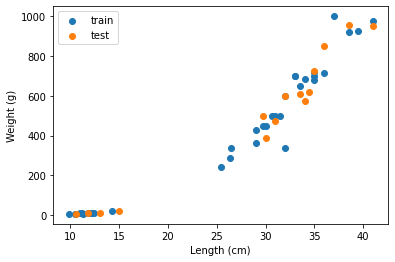

In [ ]:
# 훈련 셋, 테스트 셋 시각화
plt.scatter(X_train[:, 1], X_train[:, 0], label='train')
plt.scatter(X_test[:, 1], X_test[:, 0], label='test')

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.show()

# 분류 모델 평가 지표

In [ ]:
# 테스트 셋의 오차 행렬(confusion matrix, 혼동 행렬, 혼돈 행렬)
confusion_matrix(y_true=y_test, y_pred=test_pred)

array([[11,  0],
       [ 0,  4]])

**Confusion Matrix**(오차/혼돈/혼동 행렬)

<table>
    <tr>
        <th colspan="3">예측값</th>
    </tr>
    <tr>
        <th></th>
        <th>Positive</th>
        <th>Negative</th>
    </tr>
    <tr>
        <th>Positive</th>
        <td>TP</td>
        <td>FN</td>
    </tr>
    <tr>
        <th>Negative</th>
        <td>FP</td>
        <td>TN</td>
    </tr>
</table>

* 용어 정리
    * TP(True Positive, 진짜 양성): 실제로 양성인 것을 양성으로 맞게 예측한 것.
    * FN(False Negative, 가짜 음성): 실제로 양성인 것을 음성으로 틀리게 예측한 것.
    * FP(False Positive, 가짜 양성): 실제로 음성인 것을 양성으로 틀리게 예측한 것.
    * TN(True Negative, 진짜 음성): 실제로 음성인 것은 음성으로 맞게 예측한 것.

* 정확도(accuracy): 샘플들을 정확하게 분류한 비율. 전체 샘플에서 정답의 비율.
> accuracy = (TP + TN) / (TP + FN + FP + TN)

* 정밀도(precision): 양성 예측들 중에서 정답의 비율. 양성으로 예측한 샘플들 중에서 양성으로 맞게 예측한 샘플들의 비율.
> precision = TP / (TP + FP)

* 재현율(recall): 실제 양성 샘플들 중에서 정답의 비율. 실제로 양성인 샘플들 중에서 양성으로 맞게 예측한 샘플들의 비율.
> recall = TP / (TP + FN)

* F1-score: 정밀도와 재현율의 조화 평균(역수들의 평균의 역수)
> f1-score = 2 / (1/precision) + (1/recall))


In [ ]:
report = classification_report(y_true=y_test, y_pred=test_pred)
print(report)

              precision    recall  f1-score   support

       Bream       1.00      1.00      1.00        11
       Smelt       1.00      1.00      1.00         4

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



# 특성 스케일링(feature scaling)

* 표준화(standardization)
    * 모든 특성의 평균이 0, 표준편차가 1이 되도록 스케일을 변환.
    * x_scaled = (x - mu) / sigma
    * StandardScaler

* 정규화(normalization)
    * 모든 특성의 최솟값이 0, 최댓값이 1이 되도록 스케일을 변환.
    * x_scaled = (x - min) / (max - min)
    * MinMaxScaler


## 특성 스케일링의 필요성

`[150g, 25cm]` 특성을 갖는 가상의 물고기의 예측값?

In [ ]:
test_fish = [[150, 25]]  # 150g, 25cm의 생선 - (1, 2) shape의 2차원 배열
prediction = knn.predict(test_fish)
prediction

array(['Smelt'], dtype=object)

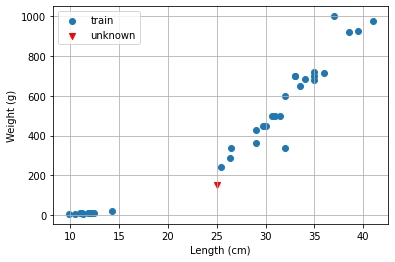

In [ ]:
# 훈련 셋, 가상의 테스트 물고기 시각화
plt.scatter(X_train[:, 1], X_train[:, 0], label='train')  # 훈련 셋
plt.scatter(x=25, y=150, label='unknown', marker='v', color='red')  # 테스트 물고기(25cm, 150g)

plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.grid()
plt.show()

* 생선의 두 특성(무게, 길이)은 서로 단위(g, cm)가 다르기 때문에 값의 범위 매우 다름.
    * 길이: 0 ~ 50cm, 무게: 0 ~ 1000g
    * 특성(변수)들의 스케일이 매우 다름.
    * 가장 가까운 이웃을 찾기 위해서 거리를 계산할 때, 생선의 무게가 거리 계산에 더 큰 영향을 미치게 됨.
    * 길이의 단위는 cm를 사용하고 무게의 단위를 kg을 사용하게 되면, 길이 스케일은 0 ~ 50cm이고 무게의 스케일은 0 ~ 1kg이 됨.
        * 거리 계산에서 길이가 더 큰 영향을 미치게 됨.
    * 따라서, 모든 특성(변수)들이 거리 계산에서 비슷하게 영향을 미칠 수 있도록 모든 특성들의 단위를 제거할 필요가 있음.

* KNN과 같이 거리 기반의 머신 러닝 알고리즘에서는 모델을 훈련하기 전에 반드시 모든 특성(변수)들을 비슷한 스케일이 되도록 전처리(preprocessing)를 할 필요가 있음!
    * 훈련 셋의 특성들을 사용해서, 훈련 셋과 테스트 셋을 함께 스케일을 변환해야 함.
    * 표준화: __훈련 셋의 평균과 표준 편차__를 찾아서, 훈련 셋과 테스트 셋의 스케일을 변환.
    * 정규화: __훈련 셋의 최댓값과 최솟값__을 찾아서, 훈련 셋과 테스트 셋의 스케일을 변환.

## 표준화(Standardization)

In [ ]:
std_scaler = StandardScaler()  # 특성 스케일 변환기(표준화) 생성

In [ ]:
std_scaler.fit(X_train)  # fit: 훈련 셋(X_train)의 평균과 표준편차를 계산.

StandardScaler()

In [ ]:
# scaler의 fit이 끝나면, mean_(평균), var_(분산) 변수가 생김.
print(std_scaler.mean_)
print(std_scaler.var_)

[425.92352941  26.47352941]
[1.04229779e+05 1.03194299e+02]


In [ ]:
np.mean(X_train, axis=0)

array([425.92352941,  26.47352941])

In [ ]:
np.var(X_train, axis=0)

array([1.04229779e+05, 1.03194299e+02])

In [ ]:
X_tr_scaled = std_scaler.transform(X_train)  # 훈련 셋의 특성들의 스케일을 변환.

In [ ]:
X_tr_scaled[:5, :]

array([[ 0.89230202,  0.93778693],
       [-0.19490239,  0.24870607],
       [-0.56969366, -0.10567837],
       [-1.28861145, -1.44446404],
       [ 0.5391929 ,  0.54402644]])

In [ ]:
np.mean(X_tr_scaled, axis=0)

array([-1.95921710e-16,  1.01226217e-16])

In [ ]:
np.std(X_tr_scaled, axis=0)

array([1., 1.])

In [ ]:
X_te_scaled = std_scaler.transform(X_test)  
# "훈련 셋의 평균과 표준편차"를 사용해서 테스트 셋의 특성들의 스케일을 변환
# 테스트 셋을 스케일 변환하기 위해서 fit 메서들 사용하지 않음!

In [ ]:
X_te_scaled[:5, :]

array([[-1.25763696, -1.12945564],
       [ 1.31355502,  0.93778693],
       [ 1.63878711,  1.18388724],
       [ 0.60114187,  0.79012675],
       [-1.29759405, -1.56259218]])

In [ ]:
# [150g, 25cm] 가상의 물고기 데이터를 스케일 변환
test_fish_scaled = std_scaler.transform(test_fish)
print(test_fish_scaled)

[[-0.85465892 -0.14505442]]


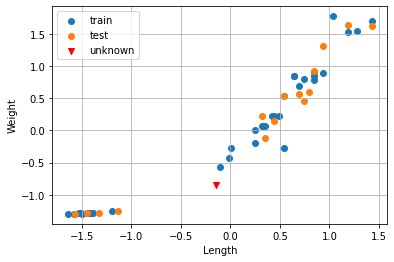

In [ ]:
# 스케일이 변환된 훈련 셋, 테스트 셋 시각화
plt.scatter(X_tr_scaled[:, 1], X_tr_scaled[:, 0], label='train')  # 훈련 셋
plt.scatter(X_te_scaled[:, 1], X_te_scaled[:, 0], label='test')   # 테스트 셋
plt.scatter(test_fish_scaled[:, 1], test_fish_scaled[:, 0], label='unknown',
            marker='v', color='red')  # 가상의 물고기

plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.grid()
plt.show()

### StandardScaler를 적용한 훈련 셋으로 훈련, 예측, 평가

In [ ]:
knn = KNeighborsClassifier()  # 모델 생성

In [ ]:
knn.fit(X_tr_scaled, y_train)  # 모델 훈련

KNeighborsClassifier()

In [ ]:
knn.score(X_tr_scaled, y_train)  # 훈련 셋의 정확도

1.0

In [ ]:
knn.score(X_te_scaled, y_test)  # 테스트 셋의 정확도

1.0

In [ ]:
# [150g, 25cm] 가상의 물고기의 예측값
knn.predict(test_fish_scaled)

array(['Bream'], dtype=object)

## 정규화(Normalization)

In [ ]:
norm_scaler = MinMaxScaler()  # 정규화 변환기 생성

In [ ]:
# 정규화를 하기 위해서 훈련 셋의 최솟값과 최댓값을 찾고, 훈련 셋의 특성들의 스케일을 변환
# (1) norm_scaler.fit(X_train)
# (2) norm_scaler.transform(X_train)
X_tr_norm = norm_scaler.fit_transform(X_train)

In [ ]:
norm_scaler.data_max_  # 훈련 셋에서 찾은 [무게, 길이]의 최댓값

array([1000.,   41.])

In [ ]:
norm_scaler.data_min_  # 훈련 셋에서 찾은 [무게, 길이]의 최솟값

array([6.7, 9.8])

In [ ]:
# 훈련 셋에서 찾은 최댓값과 최솟값으로 테스트 셋을 정규화
X_te_norm = norm_scaler.transform(X_test)

In [ ]:
# [150g, 25cm] 가상의 물고기 정규화
test_fish_norm = norm_scaler.transform(test_fish)

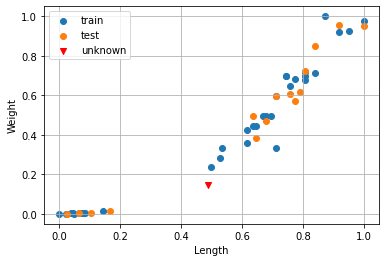

In [ ]:
# 정규화된 훈련 셋, 테스트 셋 시각화
plt.scatter(X_tr_norm[:, 1], X_tr_norm[:, 0], label='train')
plt.scatter(X_te_norm[:, 1], X_te_norm[:, 0], label='test')
plt.scatter(test_fish_norm[:, 1], test_fish_norm[:, 0], label='unknown',
            marker='v', color='red')

plt.xlabel('Length')
plt.ylabel('Weight')
plt.legend()
plt.grid()
plt.show()

### 정규화가 된 훈련 셋 훈련, 예측, 평가

In [ ]:
knn = KNeighborsClassifier()  # 모델 생성

In [ ]:
knn.fit(X_tr_norm, y_train)  # 정규화를 한 훈련 셋으로 모델을 훈련

KNeighborsClassifier()

In [ ]:
knn.score(X_tr_norm, y_train)  # 훈련 셋 정확도

1.0

In [ ]:
knn.score(X_te_norm, y_test)  # 테스트 셋 정확도

1.0

In [ ]:
# 가상의 물고기 데이터의 예측값
knn.predict(test_fish_norm)

array(['Bream'], dtype=object)

* scikit-learn 패키지의 iris 예제 데이터 셋을 로드.
* iris 데이터 탐색
* 데이터 셋을 훈련 셋과 테스트 셋으로 분리
* KNN 분류기 생성
* 모델 훈련
* 훈련 셋 평가(정확도), 테스트 셋 평가(정확도)
    * confusion matrix, 분류 리포트 출력
* KNN 모델의 k값을 변화시키면서, 모델 훈련/평가를 반복.
    * 테스트 셋에서 가장 좋은 결과를 주는 k값을 찾음.